### JayMichChi Part 2 Capstone
### Goal: Jays EDA and Data Munching.



### EDA
I am going to explore my data using a variety of tools to reduce the computational lift.

In [1]:
# Loading 700MB dataset from my hard drive

import pandas as pd
df1 = pd.read_csv('jm_cap.csv', index_col=0)

/Users/ugp/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (30,35,36,38,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder().fit_transform(df1['TOR_F_SCALE'])
LabelEncoder().fit_transform(df1['EVENT_TYPE'])
LabelEncoder().fit_transform(df1['STATE'])

df1.TOR_F_SCALE = df1.TOR_F_SCALE.apply(lambda x: str(x))


/Users/ugp/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [3]:
df1['TOR_F_SCALE'] = df1['TOR_F_SCALE'].apply(lambda x: x.replace(' ', ''))
df1['MONTH_NAME'] = df1['MONTH_NAME'].apply(lambda x: x.replace(' ', ''))

In [4]:
df1['CATEGORY']= df1['CATEGORY'].replace('NaN', 0)
df1['TOR_LENGTH']= df1['TOR_LENGTH'].replace('NaN', 0)
df1['TOR_WIDTH']= df1['TOR_WIDTH'].replace('NaN', 0)

In [5]:
# I may need to combine a few dataSeries to get a date
df1['DATE'] = pd.to_datetime(df1.BEGIN_YEARMONTH*100+df1.BEGIN_DAY,format='%Y%m%d',errors='ignore')

## For the purposes of this project, I have over 900,000 rows of data and 62 unique columns.  After some EDA on the data performed earlier, i have been able to identify reduce some features that will allow me to run my models more efficiently without hitting my CPU. 

## For the primary feature series "Event Types", there are 58 different events, ranging from Tornado's, to Seiche's (which if you didn't know is "a temporary disturbance or oscillation in the water level of a lake or partially enclosed body of water, especially one caused by changes in atmospheric pressure.".   

## I will be running models for top key event types, with the goal of predicting the absolute and probability of costs, damage, fatalities or injuries for selected event types.  

## Time to consolidate this feature set. There are far to many subclassifications (e.g. Hurricane, and Hurricane Typhoon, and Winter Weather, Blizzard,  WINTER WEATHER)



## Now I am going to clean up my 600,000 row dataframe 

In [6]:
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Excessive Heat','Drought') 
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Heat','Drought') 

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Funnel Cloud','Tornado')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Flash Flood','Flood')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Coastal Flood','Flood')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Lakeshore Flood','Flood')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Cold/Wind Chill','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Winter Weather','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Avalanche','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Blizzard','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Heavy Snow','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Hail','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Frost/Freeze','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Freezing Fog','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Ice Storm','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Lake-Effect Snow','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Sleet','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Extreme Winter Storm','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('High Snow','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('WINTER WEATHER','Winter Storm')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Dust Devil','Dust Storm')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Marine ','')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Tropical Depression','Tropical Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Waterspout','Tropical Storm')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Marine Strong Wind','ThunderStorm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Marine High Wind','ThunderStorm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Marine Thunderstorm Wind','ThunderStorm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Thunderstorm Wind','ThunderStorm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Strong Wind','ThunderStorm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Heavy Wind','ThunderStorm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Lightning','ThunderStorm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Heavy Rain','ThunderStorm')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Seiche','Flood')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Storm Surge/Tide','Flood')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('High Surf','Flood')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Astronomical Low Tide','Flood')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Sneakerwave','OTHER')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Debris Flow','OTHER')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Dense Smoke','Wildfire')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('()','')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Volcanic Ash','OTHER')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Dust Storm','OTHER')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Dust Devil','OTHER')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Northern Lights','OTHER')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Debris Flow','OTHER')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Dense Fog','OTHER')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace("Typhoon",'')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace("(",'')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace(")",'')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('High Rain','ThunderStorm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Hurricane ','Hurricane')

print df1.EVENT_TYPE.unique()

['Drought' 'Flood' 'Winter Storm' 'OTHER' 'High Wind' 'ThunderStorm'
 'Wildfire' 'Rip Current' 'Tropical Storm' 'Tornado' 'Hurricane' 'Tsunami'
 'Landslide']


##  Now going to do some further EDA on my EVENT_TYPE datasets to see of crop/property damage, casualities and fatalities.

In [7]:
# Want to add a column with a combination of injuries and deaths called casualties
df1['CASUALTIES'] = pd.DataFrame(df1.INJURIES_DIRECT + df1.INJURIES_INDIRECT + df1.DEATHS_DIRECT + df1.DEATHS_INDIRECT)
df1['TOTAL_DEATHS'] = pd.DataFrame(df1.DEATHS_DIRECT + df1.DEATHS_INDIRECT)
df1['TOTAL_INJURIES'] = pd.DataFrame(df1.INJURIES_DIRECT + df1.INJURIES_INDIRECT)

## There are many singular EPISODES (Hurricane Sandy, Hurricane IKE, Droughts, & Hurricane Katrina)  that according to NOAA reporting purposes, they have multiple episode_ID's. For EVENT-TYPE purposes, they are also many times, labeled as "flooding", "hurricane", "thunderstorms", "storm/surge", etc. In short, this labeling in my opinon, distorts the total costs and effects of these individual mega events. I attempt below to clean up this data, to more accurately reflect the true costs, effects of these mega events. 

In [8]:
df1.loc[df1['EPISODE_ID'] == 23202, 'EVENT_TYPE'] = 'Hurricane'
df1.loc[df1['EPISODE_ID'] == 50455, 'EVENT_TYPE'] = 'Tornado'
df1.loc[df1['EPISODE_ID'] == 49972, 'EVENT_TYPE'] = 'Tornado'
df1.loc[df1['EPISODE_ID'] == 49915, 'EVENT_TYPE'] = 'Winter Storm'

In [9]:
df1.loc[df1['EPISODE_ID'] == 50516, 'EVENT_TYPE'] = 'Tornado'
df1.loc[df1['EPISODE_ID'] == 50516, 'EVENT_TYPE'] = 'Tornado'

In [10]:
df1.loc[df1['EPISODE_ID'] == 203478, 'DAMAGE_PROPERTY'] = '300000000'
df1.loc[df1['EPISODE_ID'] == 198567, 'EVENT_TYPE'] = 'Hurricane'
df1.loc[df1['EPISODE_ID'] == 68471, 'EVENT_TYPE'] = 'Hurricane'

df1.loc[df1['EPISODE_ID'] == 196827, 'EVENT_TYPE'] = 'ThunderStorm'
df1.loc[df1['EPISODE_ID'] == 196828, 'EVENT_TYPE'] = 'ThunderStorm'
df1.loc[df1['EPISODE_ID'] == 196829, 'EVENT_TYPE'] = 'ThunderStorm'
df1.loc[df1['EPISODE_ID'] == 196420, 'EVENT_TYPE'] = 'ThunderStorm'
df1.loc[df1['EPISODE_ID'] == 194342, 'EVENT_TYPE'] = 'ThunderStorm'
df1.loc[df1['EPISODE_ID'] == 194342, 'EVENT_TYPE'] = 'ThunderStorm'
df1.loc[df1['EPISODE_ID'] == 197299, 'EVENT_TYPE'] = 'ThunderStorm'
df1.loc[df1['EPISODE_ID'] == 197300, 'EVENT_TYPE'] = 'ThunderStorm'
df1.loc[df1['EPISODE_ID'] == 197328, 'EVENT_TYPE'] = 'ThunderStorm'
df1.loc[df1['EPISODE_ID'] == 197342, 'EVENT_TYPE'] = 'ThunderStorm'
df1.loc[df1['EPISODE_ID'] == 197481, 'EVENT_TYPE'] = 'ThunderStorm'

df1.loc[df1['EPISODE_ID'] == 197482, 'EVENT_TYPE'] = 'ThunderStorm'
df1.loc[df1['EPISODE_ID'] == 197483, 'EVENT_TYPE'] = 'ThunderStorm'
df1.loc[df1['EPISODE_ID'] == 197484, 'EVENT_TYPE'] = 'ThunderStorm'
df1.loc[df1['EPISODE_ID'] == 197485, 'EVENT_TYPE'] = 'ThunderStorm'

# Hurricane Katrina has many episodes and many different Event Types. I took it upon myself to blanket 
# relabel these to more accurately reflect the most costly event of 2005.
df1.loc[df1['EPISODE_ID'] == 196620, 'EVENT_TYPE'] = 'Hurricane'
df1.loc[df1.DATE == '2005-08-29', 'EVENT_TYPE'] = 'Hurricane'
df1.loc[df1.DATE == '2005-08-30', 'EVENT_TYPE'] = 'Hurricane'

df1.loc[df1.DATE == '2005-08-29', 'EPISODE_ID'] = 198565
df1.loc[df1.DATE == '2005-08-30', 'EPISODE_ID'] = 198565
df1.loc[df1['EPISODE_ID'] == 198566, 'EPISODE_ID'] = 198565
df1.loc[df1['EPISODE_ID'] == 198567, 'EPISODE_ID'] = 198565
df1.loc[df1['EPISODE_ID'] == 198568, 'EPISODE_ID'] = 198565
df1.loc[df1['EPISODE_ID'] == 198569, 'EPISODE_ID'] = 198565



In [11]:
df1.drop(['BEGIN_YEARMONTH','BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'STATE_FIPS',
         'CZ_TYPE','CZ_FIPS', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE',
         'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
          'END_LOCATION', 'BEGIN_LAT','BEGIN_LON' , 'END_LAT', 'END_LON','LAST_MOD_DATE', 'LAST_MOD_TIME', 'LAST_CERT_DATE', 'LAST_CERT_TIME',
          'LAST_MOD', 'LAST_CERT', 'ADDCORR_FLG','ADDCORR_DATE','BEGIN_DAY', 'WFO', 'FLOOD_CAUSE','TOR_OTHER_WFO','TOR_OTHER_CZ_STATE'
         ], axis=1, inplace=True)


In [12]:
df1.head()

,EPISODE_ID,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,CZ_NAME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,...,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATE,CASUALTIES,TOTAL_DEATHS,TOTAL_INJURIES
0,146513,5338259,COLORADO,2003,January,Drought,UPPER YAMPA RIVER BASIN,0,0,0,...,0.0,nan,0.0,0.0,January consisted of below normal precipitatio...,NaN,2003-01-01,0,0,0
1,147987,5344607,TEXAS,2003,January,Drought,ZAPATA,0,0,0,...,0.0,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003-01-01,0,0,0
2,147987,5344606,TEXAS,2003,January,Drought,WILLACY,0,0,0,...,0.0,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003-01-01,0,0,0
3,147987,5344605,TEXAS,2003,January,Drought,STARR,0,0,0,...,0.0,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003-01-01,0,0,0
4,147987,5344604,TEXAS,2003,January,Drought,KENEDY,0,0,0,...,0.0,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003-01-01,0,0,0


In [13]:
df1.groupby('EPISODE_ID').TOTAL_INJURIES.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(11)

,EPISODE_ID,count,min,max,mean,sum
0,23202,25,0,2400,96.360000,2409
1,50455,119,0,800,16.815126,2001
2,49972,32,0,1150,36.031250,1153
3,10217,22,0,519,43.318182,953
4,178038,5,0,700,156.000000,780
5,71079,3,73,300,157.666667,473
6,79351,1,450,450,450.000000,450
7,216163,1,437,437,437.000000,437
8,49915,165,0,200,2.563636,423
9,10321,39,0,60,10.461538,408


In [14]:
df1.groupby('EVENT_TYPE').TOTAL_INJURIES.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(11)

,EVENT_TYPE,count,min,max,mean,sum
0,Tornado,20194,0,1150,0.632366,12770
1,Drought,44911,0,519,0.227183,10203
2,Winter Storm,269420,0,300,0.023937,6449
3,ThunderStorm,202620,0,100,0.030051,6089
4,Hurricane,1481,0,2400,2.301148,3408
5,Wildfire,3712,0,90,0.384968,1429
6,Flood,69661,0,136,0.015446,1076
7,OTHER,6457,0,62,0.164318,1061
8,High Wind,29065,0,65,0.020471,595
9,Rip Current,594,0,25,0.498316,296


In [15]:
df1.groupby('EPISODE_ID').TOTAL_DEATHS.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(11)

,EPISODE_ID,count,min,max,mean,sum
0,49972,32,0,161,5.062500,162
1,50455,119,0,52,1.252101,149
2,50516,83,0,27,1.204819,100
3,199630,4,1,34,12.250000,49
4,214583,8,0,30,5.750000,46
5,220620,15,0,14,2.800000,42
6,70044,15,0,23,2.600000,39
7,75831,2,1,37,19.000000,38
8,23202,25,0,12,1.440000,36
9,49915,165,0,8,0.200000,33


In [16]:
df1.groupby('EVENT_TYPE').TOTAL_DEATHS.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(11)

,EVENT_TYPE,count,min,max,mean,sum
0,Winter Storm,269420,0,10,0.005471,1474
1,Drought,44911,0,37,0.029770,1337
2,Tornado,20194,0,161,0.055462,1120
3,Flood,69661,0,23,0.015317,1067
4,ThunderStorm,202620,0,7,0.004901,993
5,Rip Current,594,0,6,0.747475,444
6,High Wind,29065,0,6,0.005815,169
7,OTHER,6457,0,14,0.023231,150
8,Hurricane,1481,0,12,0.091155,135
9,Wildfire,3712,0,19,0.036369,135


In [20]:
df1['TD'] = df1['TOTAL_DEATHS'].apply(lambda x: 1 if x > 0 else 0)

In [31]:
df1.groupby('EVENT_TYPE').TD.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(11)

,EVENT_TYPE,count,min,max,mean,sum
0,Winter Storm,269420,0,1,0.004294,1157
1,ThunderStorm,202620,0,1,0.004304,872
2,Flood,69661,0,1,0.010623,740
3,Drought,44911,0,1,0.014273,641
4,Rip Current,594,0,1,0.663300,394
5,Tornado,20194,0,1,0.015203,307
6,High Wind,29065,0,1,0.004197,122
7,OTHER,6457,0,1,0.012854,83
8,Hurricane,1481,0,1,0.040513,60
9,Wildfire,3712,0,1,0.014547,54


In [21]:
df1['TI'] = df1['TOTAL_INJURIES'].apply(lambda x: 1 if x > 0 else 0)

In [32]:
df1.groupby('EVENT_TYPE').TI.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(11)

,EVENT_TYPE,count,min,max,mean,sum
0,ThunderStorm,202620,0,1,0.014125,2862
1,Winter Storm,269420,0,1,0.004773,1286
2,Tornado,20194,0,1,0.057888,1169
3,Drought,44911,0,1,0.009240,415
4,Wildfire,3712,0,1,0.081088,301
5,Flood,69661,0,1,0.004307,300
6,High Wind,29065,0,1,0.009393,273
7,OTHER,6457,0,1,0.022301,144
8,Rip Current,594,0,1,0.232323,138
9,Hurricane,1481,0,1,0.033086,49


In [26]:
df1.head()

,EPISODE_ID,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,CZ_NAME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,...,TOR_LENGTH,TOR_WIDTH,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATE,CASUALTIES,TOTAL_DEATHS,TOTAL_INJURIES,TD,TI
0,146513,5338259,COLORADO,2003,January,Drought,UPPER YAMPA RIVER BASIN,0,0,0,...,0.0,0.0,January consisted of below normal precipitatio...,NaN,2003-01-01,0,0,0,0,0
1,147987,5344607,TEXAS,2003,January,Drought,ZAPATA,0,0,0,...,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003-01-01,0,0,0,0,0
2,147987,5344606,TEXAS,2003,January,Drought,WILLACY,0,0,0,...,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003-01-01,0,0,0,0,0
3,147987,5344605,TEXAS,2003,January,Drought,STARR,0,0,0,...,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003-01-01,0,0,0,0,0
4,147987,5344604,TEXAS,2003,January,Drought,KENEDY,0,0,0,...,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003-01-01,0,0,0,0,0


In [22]:
%matplotlib inline

In [29]:

d = pd.DataFrame(df1.groupby('EVENT_TYPE').TD.sum()).sort_values('TD', axis=0, ascending=False)
# d = d[d['TOTAL_DEATHS'] > 100 ]

i = pd.DataFrame(df1.groupby('EVENT_TYPE').TI.sum()).sort_values('TI', axis=0, ascending=False)
# i = i[i['TOTAL_INJURIES'] > 100 ]


ValueError: could not convert string to float: Tsunami

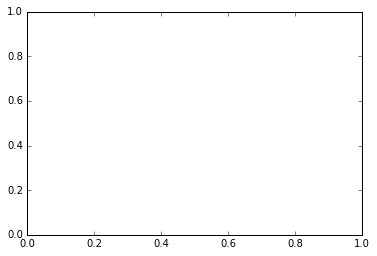

In [39]:
# i.plot(kind='bar',figsize=(20,7))
# d.plot(kind='bar',color = 'green',figsize=(20,7))

import numpy as np
import matplotlib.pyplot as plt

# data = pd.DataFrame(df1.groupby('EVENT_TYPE').TD.sum()).sort_values('TD', axis=0, ascending=False)

# X = np.arange(4)
# plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)
# plt.bar(X + 0.25, data[1], color = 'g', width = 0.25)
# plt.bar(X + 0.50, data[2], color = 'r', width = 0.25)

# plt.show()


# import matplotlib.pyplot as plt
# plt.plot(d)
# plt.ylabel('Some Numbers')
plot.show()

### More Data Cleaning.....

In [32]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

In [33]:
df1.DAMAGE_CROPS.fillna(value=0.0, inplace=True)
df1.DAMAGE_CROPS = df1.DAMAGE_CROPS.apply(value_to_float)

In [34]:
df1.DAMAGE_PROPERTY.fillna(value=0.0, inplace=True)
df1.DAMAGE_PROPERTY = df1.DAMAGE_PROPERTY.apply(value_to_float)

In [35]:
df1['COMBINED_DAMAGE'] = pd.DataFrame(df1.DAMAGE_PROPERTY + df1.DAMAGE_CROPS)

In [36]:
df1.groupby('EPISODE_ID').DAMAGE_CROPS.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(11)

,EPISODE_ID,count,min,max,mean,sum
0,64742,51,45000000.0,9.000000e+07,4.676471e+07,2.385000e+09
1,198565,621,0.0,9.000000e+07,2.518800e+06,1.564175e+09
2,51783,24,0.0,1.050000e+09,4.375000e+07,1.050000e+09
3,40184,51,20000000.0,4.000000e+07,2.039216e+07,1.040000e+09
4,203990,46,0.0,1.000000e+09,2.173913e+07,1.000000e+09
5,68979,35,0.0,7.260000e+07,2.804286e+07,9.815000e+08
6,78171,45,21000000.0,2.100000e+07,2.100000e+07,9.450000e+08
7,7401,44,300000.0,7.000000e+08,1.701136e+07,7.485000e+08
8,1030,4,3400000.0,5.686000e+08,1.772000e+08,7.088000e+08
9,43007,9,500000.0,7.000000e+08,7.855556e+07,7.070000e+08


In [37]:
df1.groupby('EVENT_TYPE').DAMAGE_CROPS.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(11)

,EVENT_TYPE,count,min,max,mean,sum
0,Drought,44911,0.0,1.050000e+09,4.026509e+05,1.808345e+10
1,Winter Storm,269420,0.0,5.686000e+08,2.106864e+04,5.676314e+09
2,Flood,69661,0.0,5.000000e+08,7.278478e+04,5.070261e+09
3,Hurricane,1481,0.0,4.230000e+08,1.966751e+06,2.912759e+09
4,ThunderStorm,202620,0.0,1.900000e+08,5.201048e+03,1.053836e+09
5,Tropical Storm,5807,0.0,1.015000e+08,1.212711e+05,7.042210e+08
6,High Wind,29065,0.0,7.500000e+07,1.980370e+04,5.755944e+08
7,Wildfire,3712,0.0,9.000000e+07,7.010440e+04,2.602275e+08
8,Tornado,20194,0.0,7.000000e+07,1.111972e+04,2.245517e+08
9,OTHER,6457,0.0,2.000000e+07,4.336379e+03,2.800000e+07


In [38]:
df1.groupby('EPISODE_ID').DAMAGE_PROPERTY.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(10)

,EPISODE_ID,count,min,max,mean,sum
0,198565,621,0.0,1.790000e+10,1.172207e+08,7.279407e+10
1,68471,50,0.0,7.500000e+09,4.991818e+08,2.495909e+10
2,23202,25,0.0,4.000000e+09,5.372432e+08,1.343108e+10
3,199954,4,0.0,1.000000e+10,2.500000e+09,1.000000e+10
4,178038,5,8200000.0,3.000000e+09,1.084520e+09,5.422600e+09
5,181034,5,90000000.0,2.500000e+09,9.660000e+08,4.830000e+09
6,179851,6,0.0,4.000000e+09,6.666667e+08,4.000000e+09
7,198928,17,500000.0,2.750000e+09,2.350000e+08,3.995000e+09
8,50455,119,0.0,1.500000e+09,2.675596e+07,3.183960e+09
9,44018,16,0.0,1.800000e+09,1.756685e+08,2.810696e+09


In [39]:
# df1[df1.EPISODE_ID == 203478]

In [40]:
df1.groupby('EVENT_TYPE').DAMAGE_PROPERTY.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(10)

,EVENT_TYPE,count,min,max,mean,sum
0,Hurricane,1481,0.0,1.790000e+10,1.025020e+08,1.518054e+11
1,Flood,69661,0.0,2.000000e+09,4.742827e+05,3.303901e+10
2,Tornado,20194,0.0,2.800000e+09,1.067652e+06,2.156015e+10
3,Winter Storm,269420,0.0,1.800000e+09,6.934622e+04,1.868326e+10
4,Wildfire,3712,0.0,1.040000e+09,1.882757e+06,6.988794e+09
5,ThunderStorm,202620,0.0,7.500000e+08,3.420505e+04,6.930626e+09
6,High Wind,29065,0.0,8.810000e+08,1.905882e+05,5.539446e+09
7,Tropical Storm,5807,0.0,2.520000e+08,4.221181e+05,2.451240e+09
8,Drought,44911,0.0,2.500000e+08,4.313890e+04,1.937411e+09
9,OTHER,6457,0.0,2.700000e+07,3.518411e+04,2.271838e+08


In [41]:
df1.groupby('EPISODE_ID').COMBINED_DAMAGE.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(10)

,EPISODE_ID,count,min,max,mean,sum
0,198565,621,0.0,1.790000e+10,1.197395e+08,7.435825e+10
1,68471,50,0.0,7.500000e+09,4.991818e+08,2.495909e+10
2,23202,25,0.0,4.000000e+09,5.372432e+08,1.343108e+10
3,199954,4,0.0,1.000000e+10,2.500000e+09,1.000000e+10
4,178038,5,8200000.0,3.150000e+09,1.141520e+09,5.707600e+09
5,181034,5,93700000.0,2.547200e+09,9.846400e+08,4.923200e+09
6,179851,6,0.0,4.025000e+09,6.708333e+08,4.025000e+09
7,198928,17,500000.0,2.750000e+09,2.350000e+08,3.995000e+09
8,50455,119,0.0,1.500000e+09,2.675596e+07,3.183960e+09
9,44018,16,0.0,1.800000e+09,1.756685e+08,2.810696e+09


In [42]:
df1.groupby('EVENT_TYPE').COMBINED_DAMAGE.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(10)

,EVENT_TYPE,count,min,max,mean,sum
0,Hurricane,1481,0.0,1.790000e+10,1.044687e+08,1.547182e+11
1,Flood,69661,0.0,2.000000e+09,5.470675e+05,3.810927e+10
2,Winter Storm,269420,0.0,1.800000e+09,9.041486e+04,2.435957e+10
3,Tornado,20194,0.0,2.800000e+09,1.078771e+06,2.178471e+10
4,Drought,44911,0.0,1.250000e+09,4.457898e+05,2.002087e+10
5,ThunderStorm,202620,0.0,7.500000e+08,3.940609e+04,7.984463e+09
6,Wildfire,3712,0.0,1.046500e+09,1.952861e+06,7.249022e+09
7,High Wind,29065,0.0,8.810000e+08,2.103919e+05,6.115040e+09
8,Tropical Storm,5807,0.0,2.520000e+08,5.433891e+05,3.155461e+09
9,OTHER,6457,0.0,3.440000e+07,3.952049e+04,2.551838e+08


In [43]:
%matplotlib inline

In [44]:
b = pd.DataFrame(df1.groupby('EVENT_TYPE').COMBINED_DAMAGE.sum()).sort_values('COMBINED_DAMAGE', axis=0, ascending=False)
b = b[b['COMBINED_DAMAGE'] > 100000000]

m = pd.DataFrame(df1.groupby('EVENT_TYPE').DAMAGE_PROPERTY.sum()).sort_values('DAMAGE_PROPERTY', axis=0, ascending=False)
m = m[m['DAMAGE_PROPERTY'] > 100 ]

q = pd.DataFrame(df1.groupby('EVENT_TYPE').DAMAGE_CROPS.sum()).sort_values('DAMAGE_CROPS', axis=0, ascending=False)
q = q[q['DAMAGE_CROPS'] > 100 ]



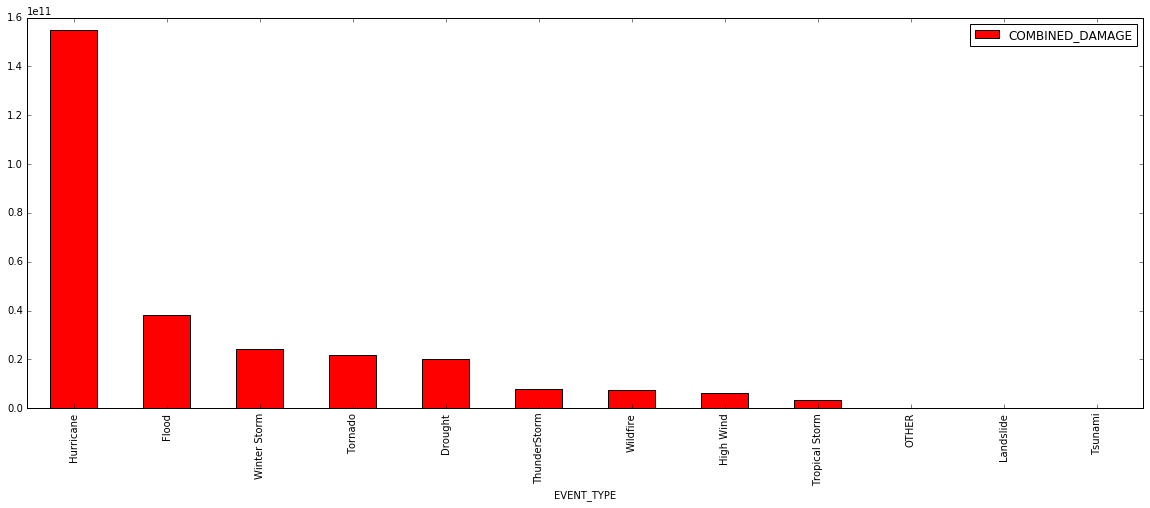

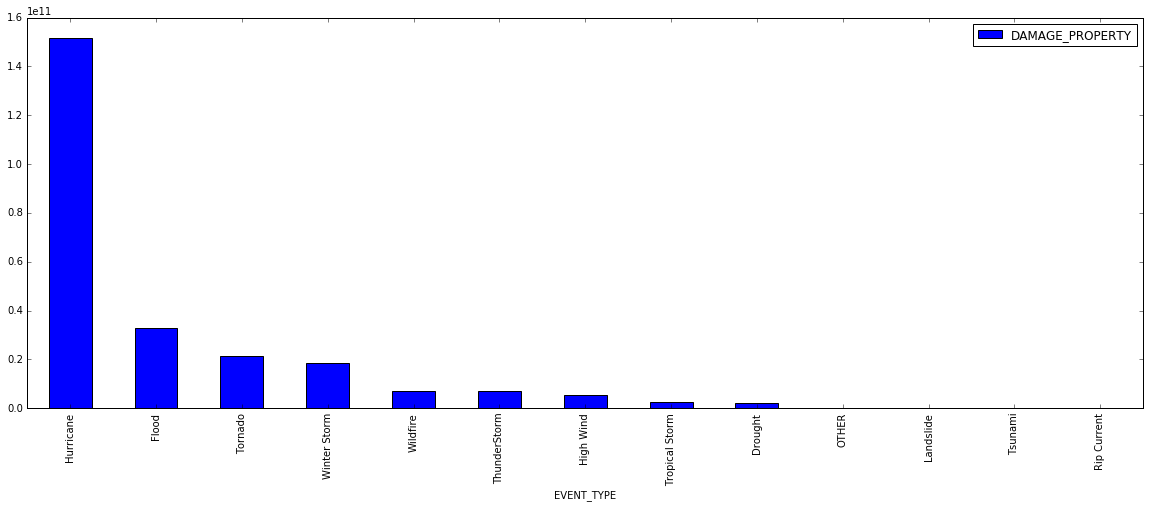

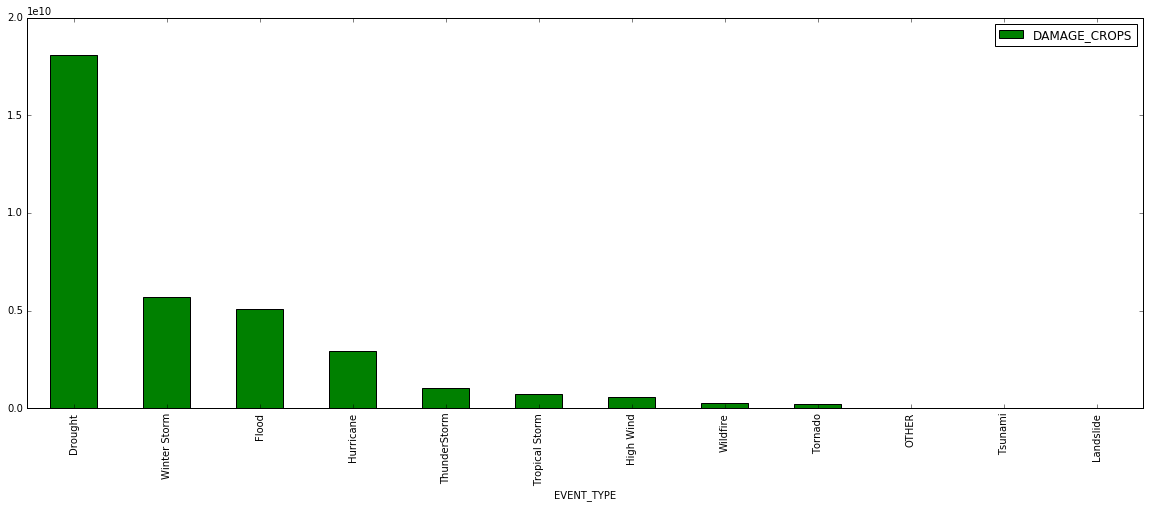

In [45]:
b.plot(kind='bar', color = 'Red',figsize=(20,7))
m.plot(kind='bar',figsize=(20,7))
q.plot(kind='bar',color = 'green',figsize=(20,7))

In [46]:
df1.head()

,EPISODE_ID,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,CZ_NAME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,...,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATE,CASUALTIES,TOTAL_DEATHS,TOTAL_INJURIES,COMBINED_DAMAGE
0,146513,5338259,COLORADO,2003,January,Drought,UPPER YAMPA RIVER BASIN,0,0,0,...,nan,0.0,0.0,January consisted of below normal precipitatio...,NaN,2003-01-01,0,0,0,0.0
1,147987,5344607,TEXAS,2003,January,Drought,ZAPATA,0,0,0,...,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003-01-01,0,0,0,0.0
2,147987,5344606,TEXAS,2003,January,Drought,WILLACY,0,0,0,...,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003-01-01,0,0,0,0.0
3,147987,5344605,TEXAS,2003,January,Drought,STARR,0,0,0,...,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003-01-01,0,0,0,0.0
4,147987,5344604,TEXAS,2003,January,Drought,KENEDY,0,0,0,...,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003-01-01,0,0,0,0.0


In [47]:
cols = ['EVENT_TYPE','EVENT_ID','EPISODE_ID','DATE','CZ_NAME','STATE','INJURIES_DIRECT','INJURIES_INDIRECT','TOTAL_INJURIES','DEATHS_DIRECT','DEATHS_INDIRECT','TOTAL_DEATHS','CASUALTIES','DAMAGE_PROPERTY','DAMAGE_CROPS','COMBINED_DAMAGE','CATEGORY','TOR_F_SCALE','TOR_LENGTH','TOR_WIDTH','EPISODE_NARRATIVE','EVENT_NARRATIVE','YEAR','MONTH_NAME']

In [48]:
df1 = df1[cols]  #    OR    df = df.ix[:, cols]

In [49]:
df1.head()

,EVENT_TYPE,EVENT_ID,EPISODE_ID,DATE,CZ_NAME,STATE,INJURIES_DIRECT,INJURIES_INDIRECT,TOTAL_INJURIES,DEATHS_DIRECT,...,DAMAGE_CROPS,COMBINED_DAMAGE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,EPISODE_NARRATIVE,EVENT_NARRATIVE,YEAR,MONTH_NAME
0,Drought,5338259,146513,2003-01-01,UPPER YAMPA RIVER BASIN,COLORADO,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,January consisted of below normal precipitatio...,NaN,2003,January
1,Drought,5344607,147987,2003-01-01,ZAPATA,TEXAS,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003,January
2,Drought,5344606,147987,2003-01-01,WILLACY,TEXAS,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003,January
3,Drought,5344605,147987,2003-01-01,STARR,TEXAS,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003,January
4,Drought,5344604,147987,2003-01-01,KENEDY,TEXAS,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003,January


In [50]:
#convert dataframe to csv

df1.to_csv('df2.csv')
#This worked!  Thank God this was successful on Tuesday school!
# 10 years worth of data (654313, 24)

### Bonus: Explain how you intend to evaluate your results. 
What tuning metric and evaluation approaches do you intend to use?
Clean> fit> run models, look at the results... 

Linear regression: Attempt to accurately predict the independent variable (casualities) by good fitting SSE / differential 

Logistic regression: Attempt to predict if I can say if a certain storm in a certain state, in a certain month would cause a causality. I would show classification accuracy score, confusion matrix coorelation number.

### Bonus Identify 1-2 additional datasets that may help you triangulate your findings. 
How might these relate to your data?

Could look at the aircraft incident reports from the NTSB site
May get an idea of crop damage in current dollar basis, perhaps rebase for inflation or the proper crop price in todays dollars, crop price website

### Useful Resources

- [Exploratory Data Analysis](http://insightdatascience.com/blog/eda-and-graphics-eli-bressert.html)
- [Best practices for data documentation](https://www.dataone.org/all-best-practices)